In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/Shareddrives/Anomaly/

/content/gdrive/Shareddrives/Anomaly


In [3]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
#from autoencoder import Autoencoder
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset as dataset
from torch.autograd import Variable

In [4]:
train_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/TRAIN_FINAL_CROSS_DOM_1500.csv')

In [5]:
train_df.head()

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,0.369437,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,0.130146,-0.314942,0.680731,-0.344192,0.0
1,-0.712442,1.429695,-0.374214,-0.852608,-0.536097,3.273131,0.201001,-0.794297,-0.068330,-0.136598,...,-0.490374,-0.598422,0.082195,-0.374214,0.201001,-0.755270,-0.426041,-1.445423,-0.361189,0.0
2,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,-0.164555,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,-0.468538,-0.314942,-2.426335,1.906829,0.0
3,-0.512219,0.741109,-0.261913,-0.598698,-0.468995,1.592125,-0.091600,-0.588015,-0.081888,-0.163937,...,-0.416409,-0.490281,-0.084858,-0.261913,-0.091600,-0.468538,-0.314942,-1.183509,-0.344192,0.0
4,1.709488,-0.580092,1.686548,1.800385,1.352691,-0.635757,-0.000646,0.862475,-0.084752,-0.164529,...,0.844407,0.309143,0.273510,1.686548,-0.000646,0.481678,4.010477,0.680731,-0.344192,0.0


In [6]:
train_df['Label'].unique()

array([0., 1.])

In [7]:
train_df['Label'][train_df['Label']>1.0] = 1.0

In [8]:
train_df.shape

(156903, 30)

In [9]:
train_df['Label'].unique()

array([0., 1.])

In [10]:
df0 = train_df.iloc[0:5000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df0

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,0.369437,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,0.130146,-0.314942,0.680731,-0.344192,0.0
1,-0.712442,1.429695,-0.374214,-0.852608,-0.536097,3.273131,0.201001,-0.794297,-0.068330,-0.136598,...,-0.490374,-0.598422,0.082195,-0.374214,0.201001,-0.755270,-0.426041,-1.445423,-0.361189,0.0
2,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,-0.164555,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,-0.468538,-0.314942,-2.426335,1.906829,0.0
3,-0.512219,0.741109,-0.261913,-0.598698,-0.468995,1.592125,-0.091600,-0.588015,-0.081888,-0.163937,...,-0.416409,-0.490281,-0.084858,-0.261913,-0.091600,-0.468538,-0.314942,-1.183509,-0.344192,0.0
4,1.709488,-0.580092,1.686548,1.800385,1.352691,-0.635757,-0.000646,0.862475,-0.084752,-0.164529,...,0.844407,0.309143,0.273510,1.686548,-0.000646,0.481678,4.010477,0.680731,-0.344192,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.543304,-0.387445,0.502623,0.976004,0.392243,-0.434899,0.191880,0.604133,-0.068841,-0.136674,...,0.528341,0.085442,0.244466,0.502623,0.191880,1.339820,-0.415745,1.105003,0.012011,1.0
4996,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,0.491397,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.745451,-0.414014,-0.170210,-0.361189,0.0
4997,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,0.308209,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737268,-0.393469,-0.170210,-0.361189,0.0
4998,1.709488,-0.580092,1.686548,1.800385,1.352691,-0.635757,0.069158,0.926859,-0.084932,-0.164550,...,0.877041,0.344565,0.335115,1.686548,0.069158,0.481678,4.010477,0.680731,-0.344192,0.0


In [11]:
df1 = train_df.iloc[5000:10000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df1

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
5000,-0.522849,-0.580092,-0.692882,-0.405823,-0.686276,-0.635757,-0.698694,-0.588015,-0.055843,-0.119892,...,-0.612462,-0.514919,-0.755001,-0.692882,-0.698694,-0.438500,-0.314942,0.680731,-0.344192,0.0
5001,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,0.231504,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.734930,-0.426041,-0.170210,-0.361189,0.0
5002,1.567728,-0.387445,1.221471,1.278762,1.350590,-0.434899,0.146883,0.759315,-0.068537,-0.136644,...,0.863768,0.475667,0.435372,1.221471,0.146883,-0.116783,2.516327,-0.170210,-0.361189,0.0
5003,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136672,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737969,-0.426041,1.105003,-0.361189,1.0
5004,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.131368,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.735320,-0.426041,-0.170210,-0.361189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.038993,-0.387445,-0.470762,0.308837,-0.371059,-0.434899,-0.676973,-0.506425,-0.068869,-0.136676,...,-0.333528,-0.542253,-0.731544,-0.470762,-0.676973,-0.116783,-0.377417,-0.170210,-0.071241,0.0
9996,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136672,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,1.339820,-0.426041,1.955144,-0.361189,1.0
9997,-0.730801,1.202553,-0.453208,-0.852608,-0.731143,0.963939,-0.431384,-0.794297,-0.011585,-0.118941,...,-0.808416,-0.657435,-0.366436,-0.453208,-0.431384,-0.755270,-0.426041,-1.445423,-0.361189,0.0
9998,-0.493532,-0.643917,-0.690708,-0.352549,-0.653583,-0.704549,-0.705155,-0.542108,-0.055672,-0.118157,...,-0.574701,-0.471623,-0.784394,-0.690708,-0.705155,-0.405379,-0.330552,0.679068,-0.329507,1.0


In [12]:
df2 = train_df.iloc[10000:15000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df2

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
10000,-0.480328,1.090839,-0.098024,-0.598698,-0.514189,1.128725,-0.217876,-0.588015,-0.082135,-0.163918,...,-0.523369,-0.507048,-0.115968,-0.098024,-0.217876,-0.468538,-0.314942,-1.183509,-0.344192,0.0
10001,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136589,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.116783,-0.042620,-0.170210,-0.361189,0.0
10002,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136676,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.116783,-0.425994,0.679932,-0.041523,0.0
10003,-0.498045,0.896544,-0.189074,-0.598698,-0.571552,0.540565,-0.378149,-0.588015,-0.056737,-0.155954,...,-0.608937,-0.514713,-0.283179,-0.189074,-0.378149,-0.468538,-0.314942,-1.183509,-0.344192,0.0
10004,-0.734473,1.157124,-0.469007,-0.852608,-0.612990,2.362776,-0.048305,-0.794297,-0.065872,-0.136109,...,-0.604560,-0.628068,-0.156438,-0.469007,-0.048305,-0.755270,-0.426041,-1.445423,-0.361189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.031649,-0.387445,0.621115,1.352401,0.392243,-0.434899,0.527328,0.820471,-0.068779,-0.136668,...,0.656431,0.224807,0.403157,0.621115,0.527328,1.339820,-0.415745,1.105003,-0.361189,1.0
14996,-0.498045,0.896544,-0.189074,-0.598698,-0.592411,0.326688,-0.436430,-0.588015,-0.006621,-0.137588,...,-0.645609,-0.516433,-0.329843,-0.189074,-0.436430,-0.468538,-0.314942,-1.183509,-0.344192,0.0
14997,0.068897,-0.580092,0.229754,0.336029,1.851568,-0.635757,1.963501,2.133486,-0.071373,-0.163770,...,1.845359,1.733803,1.296581,0.229754,1.963501,0.481678,-0.306687,0.680731,-0.344192,0.0
14998,-0.829939,-0.024017,-0.879778,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136677,...,-0.878607,-0.660556,-0.943928,-0.879778,-0.814463,-0.738749,-0.415745,1.105003,5.267809,1.0


In [13]:
df3 = train_df.iloc[15000:20000]
#df3.loc[ df3['Label'] == 2.0, 'Label'] = 1.0
df3

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
15000,-0.501589,0.857686,-0.207284,-0.598698,-0.517666,1.093079,-0.227589,-0.588015,-0.033315,-0.152347,...,-0.511145,-0.505536,-0.170408,-0.207284,-0.227589,-0.468538,-0.314942,-1.183509,-0.344192,0.0
15001,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136672,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737969,-0.426041,1.105003,-0.361189,1.0
15002,-0.345265,-0.387445,0.172427,-0.179720,-0.599862,-0.434899,-0.552996,-0.529172,-0.068378,-0.136554,...,-0.522316,-0.607670,-0.423177,0.172427,-0.552996,-0.116783,-0.425994,-0.170210,-0.361189,0.0
15003,-0.519306,0.663391,-0.298333,-0.598698,-0.463780,1.645594,-0.077030,-0.588015,0.032009,-0.141407,...,-0.401129,-0.487233,-0.088747,-0.298333,-0.077030,-0.468538,-0.314942,-1.183509,-0.344192,0.0
15004,0.972901,-0.387445,0.964740,1.536076,0.973628,-0.434899,0.663128,1.258987,-0.068828,-0.136674,...,1.151507,0.875570,0.753948,0.964740,0.663128,1.339820,-0.415745,1.105003,0.002953,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.709488,-0.580092,1.686548,1.800385,1.352691,-0.635757,0.398238,1.183784,-0.084596,-0.164521,...,0.987292,0.469728,0.569211,1.686548,0.398238,0.481678,4.010477,0.680731,-0.344192,0.0
19996,0.748923,-0.387445,0.377812,1.022720,0.973628,-0.434899,1.155658,1.576631,-0.066163,-0.136444,...,1.110517,0.814928,0.681164,0.377812,1.155658,1.339820,-0.415745,1.105003,-0.361189,1.0
19997,1.020779,-0.643917,1.482813,1.351563,2.023683,-0.704549,5.034937,2.131164,-0.055974,-0.168110,...,3.231156,4.522475,5.994260,1.482813,5.034937,0.472475,-0.314826,0.679068,-0.329507,1.0
19998,0.293623,-0.387445,0.234042,0.650492,0.392243,-0.434899,0.191880,0.604133,-0.068805,-0.136669,...,0.477834,0.033767,0.163330,0.234042,0.191880,1.339820,-0.415745,1.105003,-0.361189,1.0


In [14]:
df4 = train_df.iloc[20000:25000]
#df4.loc[ df4['Label'] == 2.0, 'Label'] = 1.0
df4

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
20000,1.626477,-0.387445,0.801222,1.156921,1.350590,-0.434899,1.278791,1.403824,-0.068432,-0.136647,...,1.346243,1.180359,1.065894,0.801222,1.278791,-0.116783,2.515579,-0.170210,-0.361189,0.0
20001,0.925168,-0.387445,0.182696,0.620703,1.888840,-0.434899,1.499974,1.533088,-0.068829,-0.136675,...,1.609992,1.637104,1.174539,0.182696,1.499974,-0.116783,1.079049,-0.170210,0.172356,0.0
20002,-0.829939,-0.024017,-0.879778,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136677,...,-0.878607,-0.660556,-0.943928,-0.879778,-0.814463,-0.738749,-0.415745,1.105003,5.267714,1.0
20003,-0.345265,-0.387445,0.172427,-0.179720,-0.599862,-0.434899,-0.552996,-0.529172,-0.068543,-0.136595,...,-0.522316,-0.607670,-0.423177,0.172427,-0.552996,-0.116783,-0.425994,-0.170210,-0.361189,0.0
20004,-0.738145,1.111696,-0.484806,-0.852608,-0.637371,2.074127,-0.127353,-0.794297,-0.025660,-0.127697,...,-0.629591,-0.633300,-0.146893,-0.484806,-0.127353,-0.755270,-0.426041,-1.445423,-0.361189,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136672,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737969,-0.426041,1.105003,-0.361189,1.0
24996,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136676,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737580,-0.426041,1.105003,0.117167,1.0
24997,-0.345265,-0.387445,0.172427,-0.179720,-0.599862,-0.434899,-0.552996,-0.529172,-0.068601,-0.136610,...,-0.522316,-0.607670,-0.423177,0.172427,-0.552996,-0.116783,-0.425994,-0.170210,-0.361189,0.0
24998,0.047637,-0.580092,-0.161759,0.152257,1.851568,-0.635757,2.840908,2.244565,-0.084813,-0.164547,...,2.041468,2.094844,1.533713,-0.161759,2.840908,0.481678,-0.244289,0.680731,-0.344192,0.0


In [15]:
df_final = pd.concat([df0,df1, df2,df3,df4])#df6,df7,df8,df9,df10])
df_final

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,...,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Label
0,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,0.369437,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,0.130146,-0.314942,0.680731,-0.344192,0.0
1,-0.712442,1.429695,-0.374214,-0.852608,-0.536097,3.273131,0.201001,-0.794297,-0.068330,-0.136598,...,-0.490374,-0.598422,0.082195,-0.374214,0.201001,-0.755270,-0.426041,-1.445423,-0.361189,0.0
2,-0.632694,-0.580092,-0.881051,-0.598698,-0.686276,-0.635757,-0.698694,-0.588015,-0.085003,-0.164555,...,-0.694505,-0.517268,-0.835366,-0.881051,-0.698694,-0.468538,-0.314942,-2.426335,1.906829,0.0
3,-0.512219,0.741109,-0.261913,-0.598698,-0.468995,1.592125,-0.091600,-0.588015,-0.081888,-0.163937,...,-0.416409,-0.490281,-0.084858,-0.261913,-0.091600,-0.468538,-0.314942,-1.183509,-0.344192,0.0
4,1.709488,-0.580092,1.686548,1.800385,1.352691,-0.635757,-0.000646,0.862475,-0.084752,-0.164529,...,0.844407,0.309143,0.273510,1.686548,-0.000646,0.481678,4.010477,0.680731,-0.344192,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136672,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737969,-0.426041,1.105003,-0.361189,1.0
24996,-0.859313,-0.387445,-1.006168,-0.852608,-0.849295,-0.434899,-0.814463,-0.794297,-0.068872,-0.136676,...,-0.904707,-0.660804,-1.001200,-1.006168,-0.814463,-0.737580,-0.426041,1.105003,0.117167,1.0
24997,-0.345265,-0.387445,0.172427,-0.179720,-0.599862,-0.434899,-0.552996,-0.529172,-0.068601,-0.136610,...,-0.522316,-0.607670,-0.423177,0.172427,-0.552996,-0.116783,-0.425994,-0.170210,-0.361189,0.0
24998,0.047637,-0.580092,-0.161759,0.152257,1.851568,-0.635757,2.840908,2.244565,-0.084813,-0.164547,...,2.041468,2.094844,1.533713,-0.161759,2.840908,0.481678,-0.244289,0.680731,-0.344192,0.0


In [16]:
df_final['Label'].value_counts()

0.0    16386
1.0     8614
Name: Label, dtype: int64

In [17]:
#First get the labels and then drop it. Dont run it first.

df0_arr = df0.drop(columns=['Label'])
df1_arr = df1.drop(columns=['Label'])
df2_arr = df2.drop(columns=['Label'])
df3_arr = df3.drop(columns=['Label'])
df4_arr = df4.drop(columns=['Label'])
#df5_arr = df5.drop(columns=['Label'])
# df6_arr = df6.drop(columns=['Label'])
# df7_arr = df7.drop(columns=['Label'])
# df8_arr = df8.drop(columns=['Label'])
# df9_arr = df9.drop(columns=['Label'])
# df10_arr = df10.drop(columns=['Label'])

In [18]:
df0_arr = df0_arr.to_numpy()
df1_arr = df1_arr.to_numpy()
df2_arr = df2_arr.to_numpy()
df3_arr = df3_arr.to_numpy()
df4_arr = df4_arr.to_numpy()
#df5_arr = df5_arr.to_numpy()
# df6_arr = df6_arr.to_numpy()
# df7_arr = df7_arr.to_numpy()
# df8_arr = df8_arr.to_numpy()
# df9_arr = df9_arr.to_numpy()
# df10_arr = df10_arr.to_numpy()

In [19]:
df0_arr = df0_arr.reshape(1,df0_arr.shape[0],df0_arr.shape[1])
df0_arr.shape

(1, 5000, 29)

In [20]:
df1_arr = df1_arr.reshape(1,df1_arr.shape[0],df1_arr.shape[1])
df1_arr.shape

(1, 5000, 29)

In [21]:
df2_arr = df2_arr.reshape(1,df2_arr.shape[0],df2_arr.shape[1])
df2_arr.shape

(1, 5000, 29)

In [22]:
df3_arr = df3_arr.reshape(1,df3_arr.shape[0],df3_arr.shape[1])
df3_arr.shape

(1, 5000, 29)

In [23]:
df4_arr = df4_arr.reshape(1,df4_arr.shape[0],df4_arr.shape[1])
df4_arr.shape

(1, 5000, 29)

In [24]:
data_final_train = np.vstack((df0_arr,df1_arr,df2_arr,df3_arr,df4_arr))#df6_arr,df7_arr,df8_arr,df9_arr,df10_arr))
data_final_train.shape

(5, 5000, 29)

In [25]:
labels = pd.concat([df0['Label'],df1['Label'],df2['Label'],df3['Label'], df4['Label']])
labels

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
24995    1.0
24996    1.0
24997    0.0
24998    0.0
24999    0.0
Name: Label, Length: 25000, dtype: float64

In [26]:
labels = labels.to_numpy()

In [27]:
BOT_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/BOT.csv')

In [28]:
BOT_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [29]:
X_BOT_test = BOT_test.drop(labels = ['Label'], axis=1)

In [30]:
X_BOT_test = X_BOT_test.to_numpy()

In [31]:
y_BOT_test = BOT_test['Label']

In [32]:
y_BOT_test.value_counts()

1.0    10000
Name: Label, dtype: int64

In [33]:
y_BOT_test[y_BOT_test>1.0] = 1.0

In [34]:
y_BOT_test = y_BOT_test.to_numpy()

In [35]:
RARE_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/RARE.csv')

In [36]:
RARE_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [37]:
X_RARE_test = RARE_test.drop(labels = ['Label'], axis=1)

In [38]:
X_RARE_test = X_RARE_test.to_numpy()

In [39]:
y_RARE_test = RARE_test['Label']

In [40]:
y_RARE_test.value_counts()

1.0    566
Name: Label, dtype: int64

In [41]:
y_RARE_test[y_RARE_test>1.0] = 1.0

In [42]:
y_RARE_test = y_RARE_test.to_numpy()

In [43]:
SlowHTTPTest_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/SlowHTTPTest.csv')

In [44]:
SlowHTTPTest_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [45]:
X_SlowHTTPTest_test = SlowHTTPTest_test.drop(labels = ['Label'], axis=1)

In [46]:
X_SlowHTTPTest_test = X_SlowHTTPTest_test.to_numpy()

In [47]:
y_SlowHTTPTest_test = SlowHTTPTest_test['Label']

In [48]:
y_SlowHTTPTest_test.value_counts()

1.0    461912
Name: Label, dtype: int64

In [49]:
y_SlowHTTPTest_test[y_SlowHTTPTest_test>1.0] = 1.0

In [50]:
y_SlowHTTPTest_test = y_SlowHTTPTest_test.to_numpy()

In [51]:
OOD_INFIL_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/OOD_INFIL.csv')

In [52]:
OOD_INFIL_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [53]:
X_OOD_INFIL_test = OOD_INFIL_test.drop(labels = ['Label'], axis=1)

In [54]:
X_OOD_INFIL_test = X_OOD_INFIL_test.to_numpy()

In [55]:
y_OOD_INFIL_test = OOD_INFIL_test['Label']

In [56]:
y_OOD_INFIL_test.value_counts()

1.0    49504
Name: Label, dtype: int64

In [57]:
y_OOD_INFIL_test[y_OOD_INFIL_test>1.0] = 1.0

In [58]:
y_OOD_INFIL_test = y_OOD_INFIL_test.to_numpy()

In [59]:
DDOS_SOLARIS_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_SOLARIS.csv')

In [60]:
DDOS_SOLARIS_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [61]:
X_DDOS_SOLARIS_test = DDOS_SOLARIS_test.drop(labels = ['Label'], axis=1)

In [62]:
X_DDOS_SOLARIS_test = X_DDOS_SOLARIS_test.to_numpy()

In [63]:
y_DDOS_SOLARIS_test = DDOS_SOLARIS_test['Label']

In [64]:
y_DDOS_SOLARIS_test.value_counts()

1.0    10990
Name: Label, dtype: int64

In [65]:
y_DDOS_SOLARIS_test[y_DDOS_SOLARIS_test>1.0] = 1.0

In [66]:
y_DDOS_SOLARIS_test = y_DDOS_SOLARIS_test.to_numpy()

In [67]:
DDOS_HOIC_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_HOIC.csv')

In [68]:
DDOS_HOIC_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [69]:
X_DDOS_HOIC_test = DDOS_HOIC_test.drop(labels = ['Label'], axis=1)

In [70]:
X_DDOS_HOIC_test = X_DDOS_HOIC_test.to_numpy()

In [71]:
y_DDOS_HOIC_test = DDOS_HOIC_test['Label']

In [72]:
y_DDOS_HOIC_test.value_counts()

1.0    686012
Name: Label, dtype: int64

In [73]:
y_DDOS_HOIC_test[y_DDOS_HOIC_test>1.0] = 1.0

In [74]:
y_DDOS_HOIC_test = y_DDOS_HOIC_test.to_numpy()

In [75]:
DDOS_GOLDEN_EYE_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/DDOS_GOLDEN_EYE.csv')

In [76]:
DDOS_GOLDEN_EYE_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [77]:
X_DDOS_GOLDEN_EYE_test = DDOS_GOLDEN_EYE_test.drop(labels = ['Label'], axis=1)

In [78]:
X_DDOS_GOLDEN_EYE_test = X_DDOS_GOLDEN_EYE_test.to_numpy()

In [79]:
y_DDOS_GOLDEN_EYE_test = DDOS_GOLDEN_EYE_test['Label']

In [80]:
y_DDOS_GOLDEN_EYE_test.value_counts()

1.0    41508
Name: Label, dtype: int64

In [81]:
y_DDOS_GOLDEN_EYE_test[y_DDOS_GOLDEN_EYE_test>1.0] = 1.0

In [82]:
y_DDOS_GOLDEN_EYE_test = y_DDOS_GOLDEN_EYE_test.to_numpy()

In [83]:
BENIGN_TEST_test = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/BENIGN_TEST.csv')

In [84]:
BENIGN_TEST_test.isna().sum()

Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Idle Min             0
Label                0
dtype: int64

In [85]:
X_BENIGN_TEST_test = BENIGN_TEST_test.drop(labels = ['Label'], axis=1)

In [86]:
X_BENIGN_TEST_test = X_BENIGN_TEST_test.to_numpy()

In [87]:
y_BENIGN_TEST_test = BENIGN_TEST_test['Label']

In [88]:
y_BENIGN_TEST_test.value_counts()

0.0    9946
Name: Label, dtype: int64

In [89]:
y_BENIGN_TEST_test[y_BENIGN_TEST_test>1.0] = 1.0

In [90]:
y_BENIGN_TEST_test = y_BENIGN_TEST_test.to_numpy()

In [91]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [92]:
def construct_pair(X_list_train):  # 3 * 1000 * 29
  n_dom = len(X_list_train) # 4 * 1000 * 29
  X_in = np.vstack(X_list_train)  ## 3000 * 29 # orignial data with all classes/labels
  print("Xin SHAPE TRAIN DATA", X_in.shape)
  X_outs = [] # ground truth data #3 * 1000 * 29
  for i in range(0, n_dom): # for each domain
      X = X_list_train[i]  # take first domain 1 * 1000 * 29
      Z_list = []
      for j in range(0, n_dom):
          Z_list.append(X) # make 3 (num of domains) copies of the same 1000 samples. 3 * 1000 * 29
      Z = np.vstack(Z_list) # Z shape: 3000 * 29 # one domain data copied three times
      X_outs.append(Z) #  3 * 3000 * 29 ## all class samples stacked to nos of domains.
  return X_in, X_outs

In [93]:
X_list_train = data_final_train
print ("SHAPE TRAIN DATA:", X_list_train.shape)

Y_train = labels
print ("Ytrain shape:", Y_train.shape)
print ("Ytrain :", Y_train)

X_in, X_outs = construct_pair(X_list_train)

print ("X_in SHAPE:", X_in.shape) # 20000 * 29 # stacked original data
print ("X_out SHAPE:", len(X_outs)) # 4 * 20000 * 29

normed = X_in

SHAPE TRAIN DATA: (5, 5000, 29)
Ytrain shape: (25000,)
Ytrain : [0. 0. 0. ... 0. 0. 0.]
Xin SHAPE TRAIN DATA (25000, 29)
X_in SHAPE: (25000, 29)
X_out SHAPE: 5


In [94]:
print(len(X_list_train), len(X_outs), X_list_train[0].shape, X_outs[0].shape)

5 5 (5000, 29) (25000, 29)


In [95]:
class Dataset(dataset):
    def __init__(self, train=True, dom=0):
        super(Dataset, self).__init__()

        #print ("DOMAIN >>>>>>>>>>>:", dom)
        self.dom = dom

        if train:
            self.inputs = normed  # inputs of all domains
            self.outs = X_outs[self.dom]  # the matrix of replicated data sets taken from the lth domain # 1 * 20000 * 29
            self.targets = Y_train
            self.dom0 = X_outs[0]
            self.dom1 = X_outs[1]
            self.dom2 = X_outs[2]
            self.dom3 = X_outs[3]
            self.dom4 = X_outs[4]
            # self.dom = []
            # for i in range(len(X_list_train)):
            #  self.dom.append(X_list_train[i])
        else:
            (self.inputs, self.outs) = (X_test_in4, y_test_in4)

        # self.images = self.images.reshape(-1, 1, 256)

    def __getitem__(self, index):
        input = self.inputs[index]
        output = self.outs[index]
        targets = self.targets[index]
        dominp = (self.dom0[index], self.dom1[index], self.dom2[index], self.dom3[index], self.dom4[index])
        #dominp = tuple(self.dom)
        return input, output, targets, dominp  ## input 3000 * 29 , output 1 * 3000 * 29

    def __len__(self):
        return len(self.inputs)

    pass


In [96]:
epochs = 100
batch_size = 200
feats = 29
domains = 5
classes = 2
latent_dims = 7
learning_rate = 0.009

In [97]:
#model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [98]:
class MultitaskAutoencoder(nn.Module):
    def __init__(self, D_in, H=20, H2=14, latent_dim=7):
        # Encoder
        super(MultitaskAutoencoder, self).__init__()
        self.linear1 = nn.Linear(D_in, H)  # 29 * 20
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2 = nn.Linear(H, H2)  # 20 * 10
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3 = nn.Linear(H2, H2)  # 10 * 10
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)
        self.num_class = classes

        self.fc1 = nn.Linear(H2, latent_dim)  # 10 * 7

        self.classifier = nn.Linear(latent_dim, self.num_class)  # 7 * 3

        # classifier
        # self.classifier = nn.Linear(latent_dim, self.num_class) # 7 * 3

        #         # Decoder
        self.fc3 = nn.Linear(latent_dim, latent_dim)  # 7 * 7
        #         self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)  # 7 * 10
        #         self.fc_bn4 = nn.BatchNorm1d(H2)

        self.linear4 = nn.Linear(H2, H2)  # 10 * 10
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5 = nn.Linear(H2, H)  # 10 * 20
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6 = nn.Linear(H, D_in)  # 20 * 29
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)
        self.relu = nn.ReLU()

    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))  # 29 * 20
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))  # 20 * 10
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))  # 10 * 10

        fc1 = self.relu(self.fc1(lin3))  # 10 * 7
        # fc2 = F.relu(self.classifier(fc1)) # 7 * 3
        return fc1

    def decode(self, z):
        fc3 = self.relu(self.fc3(z))  # 7 * 7
        fc4 = self.relu(self.fc4(fc3))  # .view(128, -1) # 7 * 10

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))  # 10 * 10
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))  # 10 * 20
        return self.lin_bn6(self.linear6(lin5))  # 20 * 29

    def forward(self, inputs):  #batch * feats
        z = self.encode(inputs)  # 29 * 3
        logits = self.classifier(z)
        reconstruction = self.decode(z)

        return logits, reconstruction, z

In [99]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss()
        self.classification_criterion = nn.CrossEntropyLoss()

    def calculate_gram_mat(self,X, sigma):  # required only for codes
        """calculate gram matrix for variables x
            Args:
            x: random variable with two dimensional (N,d).
            sigma: kernel size of x (Gaussain kernel)
        Returns:
            Gram matrix (N,N)
        """
        x = X.view(X.shape[0], -1)
        instances_norm = torch.sum(x ** 2, -1).reshape((-1, 1))
        dist = -2 * torch.mm(x, x.t()) + instances_norm + instances_norm.t()

        return torch.exp(-dist / sigma)

    def renyi_entropy(self, code, sigma):  # code is batch * latent dim
        # calculate entropy for single variables x (Eq.(9) in paper)
        #         Args:
        #         x: random variable with two dimensional (N,d).
        #         sigma: kernel size of x (Gaussain kernel)
        #         alpha:  alpha value of renyi entropy
        #     Returns:
        #         renyi alpha entropy of x.

        alpha = 2  ## Renyi's 2nd order entropya

        # calculate kernel with new updated sigma
        code_k = self.calculate_gram_mat(code, sigma)
        code_k = code_k / torch.trace(code_k)
        # eigv = torch.abs(torch.symeig(k, eigenvectors=True)[0])
        eigv, eigvec = torch.linalg.eigh(code_k)
        eig_pow = eigv ** alpha
        entropy = (1 / (1 - alpha)) * torch.log2(torch.sum(eig_pow))
        # entropy = -torch.sum(eig_pow)

        return entropy

    def joint_entropy(self,code, prior, s_x, s_y):  # x = code (batch * feats), y = prior kernel (bacth * batch)

        """calculate joint entropy for random variable x and y (Eq.(10) in paper)
            Args:
            x: random variable with two dimensional (N,d).
            y: random variable with two dimensional (N,d).
            s_x: kernel size of x
            s_y: kernel size of y
            alpha:  alpha value of renyi entropy
        Returns:
            joint entropy of x and y.
        """

        alpha = 2

        code_k = self.calculate_gram_mat(code, s_x)
        prior_k = self.calculate_gram_mat(prior, s_y)
        # prior_k = calculate_gram_mat(prior, s_y) ## prior latent kernel 100 * 29

        k = torch.mul(code_k, prior_k)
        k = k / torch.trace(k)
        # eigv = torch.abs(torch.symeig(k, eigenvectors=True)[0])
        eigv, eigvec = torch.linalg.eigh(k)
        eig_pow = eigv ** alpha
        entropy = (1 / (1 - alpha)) * torch.log2(torch.sum(eig_pow))
        # entropy = torch.sum(eig_pow)

        return entropy

    def entropy_loss(self,latent_code, prior_kernel, normalize):  ## calculate MI # x = code , y = prior

        """calculate Mutual information between random variables x and y
        Args:
            x: random variable with two dimensional (N,d).
            y: random variable with two dimensional (N,d).
            s_x: kernel size of x
            s_y: kernel size of y
            normalize: bool True or False, noramlize value between (0,1)
        Returns:
            Mutual information between x and y (scale)

        """
        # global s_x
        s_x = 0.5  # code
        s_y = 0.5  # prior

        # entropy of code. code is batch * latent dimension
        Hx = self.renyi_entropy(latent_code, sigma=s_x)

        # entropy of prior ##For prior, RBF kernel is pre-computed. sigma is not considered
        Hy = self.renyi_entropy(prior_kernel, sigma=s_y)

        # joint entropy
        # Hxy = joint_entropy(x, y, s_x, s_y)
        Hxy = self.joint_entropy(latent_code, prior_kernel, s_x, s_y)

        if normalize:
            # Ixy = Hx + Hy - Hxy
            Ixy = ((Hx * Hy) / (Hxy * Hxy))
            Ixy = Ixy / (torch.max(Hx, Hy))
            #print("IXY:", Ixy)
            # Ixy = torch.log2(Ixy)

        else:
            # Ixy = Hx + Hy - Hxy
            Ixy = ((Hx * Hy) / (Hxy * Hxy))
            Ixy = Ixy / (torch.max(Hx, Hy))
            # Ixy = torch.log2(Ixy)

        return Ixy

    def forward(self, input, x_recon, Z, dom_out, logits, targets):
        loss_MSE = self.mse_loss(x_recon, dom_out)

        targets = torch.flatten(targets)
        #print ("TARGETS:",targets)

        classification_loss = self.classification_criterion(logits, targets)
        print('Classification Loss: ', classification_loss, 'MSE Loss: ', loss_MSE)
        #entropy_loss = self.entropy_loss(input,Z, True)
        # mmd_loss = self.mmd_two_distribution(input, Z, [1, 5, 10])
        # print('MMD_Loss: ', mmd_loss)

        return 1*classification_loss + (0.1 * loss_MSE)

In [100]:
class MMDLoss():
  def compute_pairwise_distances(self, x, y):
      """Computes the squared pairwise Euclidean distances between x and y.
      Args:
        x: a tensor of shape [num_x_samples, num_features]
        y: a tensor of shape [num_y_samples, num_features]
      Returns:
        a distance matrix of dimensions [num_x_samples, num_y_samples].
      """
      # Define a function to compute the squared Euclidean norm of a tensor
      def norm(x):
          return torch.sum(torch.square(x), dim=1)

      # Compute the squared pairwise Euclidean distances
      return norm(torch.unsqueeze(x, 2) - torch.transpose(y, 0, 1))

  def rbf_kernel(self, x, y, sigmas):
      """
      compute the rbf kernel value
      :param x: [num_x_samples, num_features]
      :param y: [num_y_samples, num_features]
      :param sigmas: sigmas need to use
      :return: single value of x, y kernel
      """
      beta = 1. / (2. * torch.unsqueeze(sigmas, 1))
      dist = self.compute_pairwise_distances(x, y)
      dot = -torch.matmul(beta, torch.reshape(dist, (1, -1)))
      exp = torch.exp(dot)
      return torch.mean(exp, dim=1, keepdim=True)

  def mmd_two_distribution(self, source, target, sigmas):
      """
      compute mmd loss between two distributions
      :param source: [num_samples, num_features]
      :param target: [num_samples, num_features]
      :return:
      """

      sigmas = torch.tensor(sigmas).to(device)
      xy = self.rbf_kernel(source, target, sigmas)
      xx = self.rbf_kernel(source, source, sigmas)
      yy = self.rbf_kernel(target, target, sigmas)
      return xx + yy - 2 * xy

  def MMD_Loss_func(self, num_source, y_true, y_pred, sigmas=None):
      """
      MMD loss of multiple sources
      :param num_source: number of source domain
      :param sigmas: sigma need to use, default: [1, 5, 10]
      :return:
      """
      if sigmas is None:
          sigmas = [1, 5, 10]

      cost = []

      for i in range(num_source):
          for j in range(num_source):
              domain_i = torch.where(y_true == i)[0]
              domain_j = torch.where(y_true == j)[0]
              single_res = self.mmd_two_distribution(y_pred[domain_i],
                                                y_pred[domain_j],
                                                sigmas=sigmas)
              cost.append(single_res)
      cost = torch.cat(cost)
      return torch.mean(cost)

In [101]:
D_in = 29
print ("D_in shape:", D_in)
H = 20
H2 = 14

D_in shape: 29


In [102]:
og_interval = 50
val_losses = []
train_losses = []

multitaskAE = MultitaskAutoencoder(D_in, H, H2).to(device)
optimizer = torch.optim.Adam(multitaskAE.parameters(), lr=learning_rate, weight_decay=1e-3 )

In [103]:
def train_AE():

    for epoch in range(epochs):
            train_loss = 0
            losses = []

            for domain in range(domains):
                dataset = Dataset(dom=domain)
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

                for input, out, targets, dominp in dataloader:
                    # data = data.to(device)


                    input = input.float().to(device)
                    #print ("INPUTS SHAPE:", input.shape)

                    dom_out = out.float().to(device) # ground truth data
                    #print("OUTS SHAPE:", dom_out.shape)

                    targets = targets.long().to(device)
                    #print ("TARGETS IN TRAIN:", targets)

                    for i in range(0, len(dominp)):
                      dominp[i] = dominp[i].float().to(device)

                    logits, recon_batch, Z = multitaskAE(input) ## model
                    # print ("logits train:", logits)

                    loss_mse = customLoss()
                    loss = loss_mse(input, recon_batch, Z, dom_out, logits, targets)

                    mmd = MMDLoss()
                    mmd_loss = []
                    for i in range(0, len(dominp)):
                      if i != domain:
                        mmd_loss.append(mmd.mmd_two_distribution(Z, multitaskAE.encode(dominp[i]), sigmas = [1, 5, 10]))

                    print('MMD Loss: ', torch.mean(torch.cat(mmd_loss)))
                    loss += 10*torch.mean(torch.cat(mmd_loss))
                    losses.append(loss)

                    optimizer.zero_grad()

            final_loss = torch.mean(torch.stack(losses))

            final_loss.backward()
            train_loss += final_loss.item()
            optimizer.step()

            if epochs % 50 == 0:
                print('====> Epoch: {} Average loss: {:.4f}'.format(
                    epochs, train_loss / len(dataloader.dataset)))
                train_losses.append(train_loss / len(dataloader.dataset))

Streaming output truncated to the last 5000 lines.
MMD Loss:  tensor(0.0015, device='cuda:0', grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.7291, device='cuda:0', grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0019, device='cuda:0', grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.6011, device='cuda:0', grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0012, device='cuda:0', grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.7957, device='cuda:0', grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0029, device='cuda:0', grad_fn=<MeanBackward0>)
Classification Loss:  tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>) MSE Loss:  tensor(0.7383, device='cuda:0', grad_fn=<MseLossBackward0>)
MMD Loss:  tensor(0.0026, device='cuda:0', grad_fn=<MeanBackward0

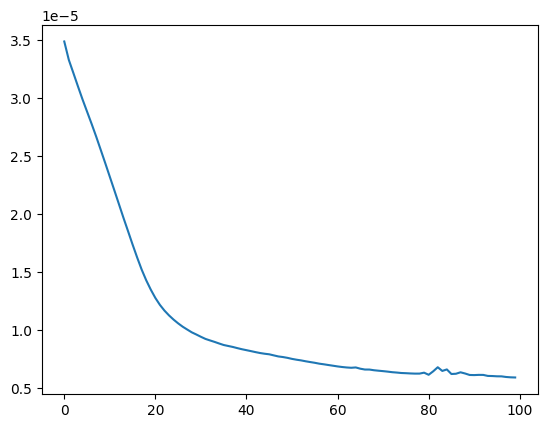

In [104]:
try:
    train_AE()
    PATH = "/content/gdrive/Shareddrives/Anomaly/weights/meta_latent_model_MI_V4.pth"
    torch.save(multitaskAE.state_dict(), PATH)
    print("MODEL SAVED")
    print ("TRAIN LOSS:", train_losses)
    print("PLOTTING TRAINING:")
    X = np.arange(epochs)
    Y = train_losses
    plt.plot(X, Y)
    plt.savefig('loss_vs_epoch.png')

except KeyboardInterrupt:
    # save model
    PATH = "/content/gdrive/Shareddrives/Anomaly/weights/meta_latent_model_MI_V4.pth"
    torch.save(multitaskAE.state_dict(), PATH)
    print("MODEL SAVED")
    print("PLOTTING TRAINING:")
    X = np.arange(epochs)
    Y = train_losses
    plt.plot(X, Y)
    plt.savefig('loss_vs_epoch.png')

In [105]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, X_test, y_test):
        #self.x, self.standardizer, self.wine = load_data(DATA_PATH)
        self.x, self.y = X_test, y_test
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [106]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

def test(X_test, y_test):
  data_set=DataBuilder(X_test, y_test)
  testloader=DataLoader(dataset=data_set,batch_size=1)
  correct = 0
  total = 0
  predict_lst = []
  labels_lst = []

  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      multitaskAE.eval()
      for data in testloader:
          X_test, labels = data
          X_test = X_test.float().to(device)
          labels = labels.long().to(device)
          # calculate outputs by running images through the network
          logits, recon_batch, Z = multitaskAE(X_test)
          #print ("logits:", logits)

          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(logits.data, 1)
          predict_lst.append(predicted.cpu().detach().numpy())
          #predicted = torch.argmax(logits)

          labels_lst.append(labels[0].cpu().detach().numpy())

          #print("out:", _)

          #print ("PREDICTED:", predicted)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f'Accuracy of the network on the test images: {100 * correct / total} %')

  prec = precision_score(labels_lst, predict_lst)
  rec = recall_score(labels_lst, predict_lst)
  f1 = f1_score(labels_lst, predict_lst)
  roc_auc = roc_auc_score(labels_lst, predict_lst)
  print(prec, rec, f1, roc_auc)

In [107]:
test(np.concatenate((X_BOT_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_BOT_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 45.85380527424045 %
0.0 0.0 0.0 0.4597828272672431


In [108]:
test(np.concatenate((X_RARE_test[:566], X_BENIGN_TEST_test[:566])), np.concatenate((y_RARE_test[:566], y_BENIGN_TEST_test[:566])))

Accuracy of the network on the test images: 46.64310954063604 %
0.12 0.01060070671378092 0.019480519480519484 0.46643109540636046


In [109]:
test(np.concatenate((X_SlowHTTPTest_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_SlowHTTPTest_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 45.86383234733781 %
0.0024937655860349127 0.0002 0.00037030179596371043 0.45988282726724317


In [110]:
test(np.concatenate((X_OOD_INFIL_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_OOD_INFIL_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 45.88890003008122 %
0.008674101610904586 0.0007 0.0012954566484685852 0.4601328272672431


In [111]:
test(np.concatenate((X_DDOS_SOLARIS_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_SOLARIS_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 55.41461947257596 %
0.7044698928703361 0.1907 0.30014952388447314 0.5551328272672431


In [112]:
test(np.concatenate((X_DDOS_HOIC_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_HOIC_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 45.883886493532536 %
0.007444168734491315 0.0006 0.0011104941699056079 0.46008282726724314


In [113]:
test(np.concatenate((X_DDOS_GOLDEN_EYE_test[:10000], X_BENIGN_TEST_test[:10000])), np.concatenate((y_DDOS_GOLDEN_EYE_test[:10000], y_BENIGN_TEST_test[:10000])))

Accuracy of the network on the test images: 47.2174872154818 %
0.2537313432835821 0.0272 0.04913294797687861 0.4733828272672431
